In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%config Completer.use_jedi = False

In [2]:
import random
import json

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import f1_score

### Classification

Automatically created module for IPython interactive environment


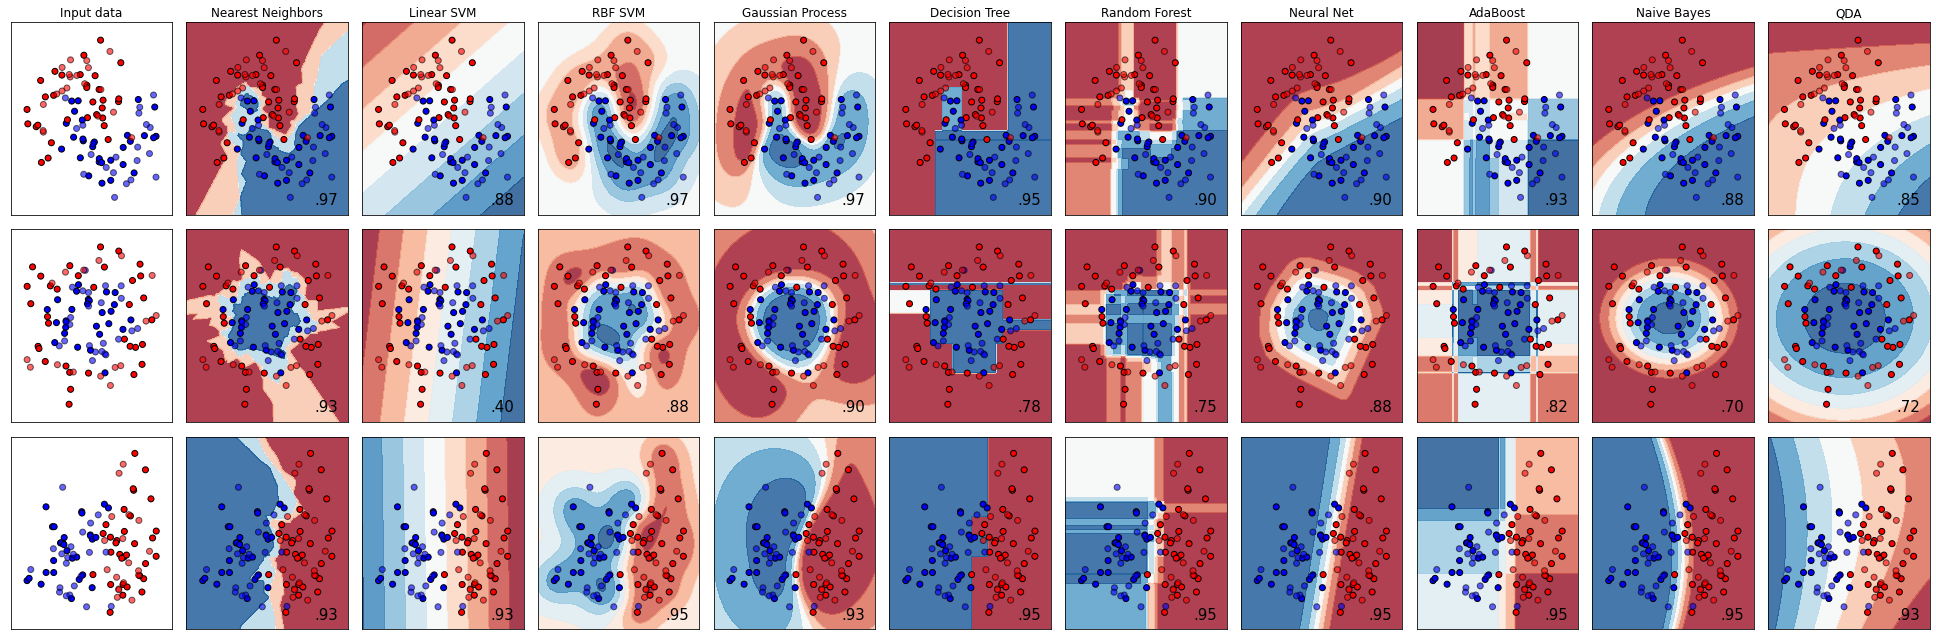

In [3]:
print(__doc__)


# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]

classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
                   edgecolors='k')
        # Plot the testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   edgecolors='k', alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

### Create Classes to Store Text Data

In [4]:
class Sentiment:
    NEGATIVE = "NEGATIVE"
    NEUTRAL = "NEUTRAL"
    POSITIVE = "POSITIVE"

In [5]:
class Review:
    def __init__ (self, text, score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()
        
    def get_sentiment (self):
        if self.score <= 2:
            return Sentiment.NEGATIVE
        elif self.score == 3:
            return Sentiment.NEUTRAL
        else:  # score of 4 or 5
            return Sentiment.POSITIVE

In [6]:
class Review_Container:
    def __init__ (self, reviews):
        self.reviews = reviews
        
    def get_text (self):
        return [x.text for x in self.reviews]
    
    def get_sentiment (self):
        return [x.sentiment for x in self.reviews]
    
    def distribute_evenly (self):
        negative = list( filter(lambda x: x.sentiment == Sentiment.NEGATIVE, self.reviews) )
        positive = list( filter(lambda x: x.sentiment == Sentiment.POSITIVE, self.reviews) )
        
        positive_shrunk = positive[:len(negative)]
        self.reviews = negative + positive_shrunk
        random.shuffle(self.reviews)
        
#         print(negative[0].text)
#         print(len(negative))
#         print(len(positive))

### Load the Data

In [7]:
# file_name = './data/books_small.json'
file_name = './data/books_large.json'
    
reviews = []
with open (file_name) as f:
    for line in f:
#         print(line)
        review = json.loads(line)
#         print(review['reviewText'])
#         print(review['overall'])
        reviews.append(Review(review['reviewText'], review['overall']))

reviews[5].score
reviews[5].text

'I hoped for Mia to have some peace in this book, but her story is so real and raw.  Broken World was so touching and emotional because you go from Mia\'s trauma to her trying to cope.  I love the way the story displays how there is no "just bouncing back" from being sexually assaulted.  Mia showed us how those demons come for you every day and how sometimes they best you. I was so in the moment with Broken World and hurt with Mia because she was surrounded by people but so alone and I understood her feelings.  I found myself wishing I could give her some of my courage and strength or even just to be there for her.  Thank you Lizzy for putting a great character\'s voice on a strong subject and making it so that other peoples story may be heard through Mia\'s.'

In [8]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
train, test = train_test_split(reviews, test_size=0.33, random_state=42)

train_container = Review_Container(train)
test_container = Review_Container(test)

In [9]:
train[0].sentiment

'POSITIVE'

In [10]:
X_train = [x.text for x in train]
y_train = [x.sentiment for x in train]

In [11]:
X_test = [x.text for x in test]
y_test = [x.sentiment for x in test]

In [12]:
train_container.distribute_evenly()
test_container.distribute_evenly()

In [13]:
X_train = train_container.get_text()
y_train = train_container.get_sentiment()

In [14]:
X_test = test_container.get_text()
y_test = test_container.get_sentiment()

In [15]:
y_train.count(Sentiment.POSITIVE)

436

In [16]:
y_train.count(Sentiment.NEGATIVE)

436

#### Bag of Words Vectorization

In [39]:
# OPTION 1
# vectorizer = CountVectorizer()

# OPTION 2
vectorizer = TfidfVectorizer()

vectorizer.fit_transform(X_train)  # or use fit then transform

<872x8906 sparse matrix of type '<class 'numpy.float64'>'
	with 53647 stored elements in Compressed Sparse Row format>

In [40]:
X_train_vectors = vectorizer.fit_transform(X_train)
print(X_train_vectors[0].toarray())

[[0. 0. 0. ... 0. 0. 0.]]


In [41]:
X_test_vectors = vectorizer.transform(X_test)

#### Linear Support Vector Machine Classifier

In [42]:
from sklearn import svm

In [43]:
svm_classifier = svm.SVC(kernel='linear')

svm_classifier.fit(X_train_vectors, y_train)

svm_classifier.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

In [44]:
X_test[0]

"I absolutely loved The Secret Scripture and The Temporary Gentleman, being the 3rd in the trilogy, was as good, if not better.  I love Sebastian Barry's writing it's so lyrical and descriptive.  I also love the fact that even though it's the 3rd book in the series, you could pick up any one of the books & it doesn't matter whether or not you've read the other 2.  I haven't yet read The Whereabouts of Aneas McNulty but I really want to now.  This is about the author's Grandfather who had an extraordinary life, serving in the Merchant Navy during world war 1, becoming an engineer between the wars and joining the British Army during the 2nd World War.  His relationships with those people around him, his wife, in particular.  A great story brought to life by a truly great Story Teller!"

#### Decision Tree Classifier

In [45]:
from sklearn.tree import DecisionTreeClassifier

In [46]:
dt_claffifier = DecisionTreeClassifier()

dt_claffifier.fit(X_train_vectors, y_train)

dt_claffifier.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

#### Naive Bayes Classifier

In [47]:
from sklearn.naive_bayes import GaussianNB

In [48]:
gnb_classifier = GaussianNB()

gnb_classifier.fit(X_train_vectors.toarray(), y_train)

X_test_array = X_test_vectors.toarray() # use .reshape() if needed
gnb_classifier.predict(X_test_array)

array(['POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE',
       'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE',
       'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE', 'POSITIVE',
       'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE',
       'POSITIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'POSITIVE', 'POSITIVE', 'NEGATIVE',
       'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'NEGATIVE', 'POSITI

#### Logistic Regression Classifier

In [49]:
from sklearn.linear_model import LogisticRegression

In [50]:
log_classifier = LogisticRegression()

log_classifier.fit(X_train_vectors, y_train)

log_classifier.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')

### Evaluation of Classifiers

MEAN ACCURACY

In [51]:
# SVM
svm_classifier.score(X_test_vectors, y_test)

0.8076923076923077

In [52]:
# Decision Tree
dt_claffifier.score(X_test_vectors, y_test)

0.6538461538461539

In [53]:
# Gaussian Naive Bayes
gnb_classifier.score(X_test_array, y_test)

0.6610576923076923

In [54]:
# Logistic Regression
log_classifier.score(X_test_vectors, y_test)

0.8052884615384616

F1-SCORE: More important metric for data science

In [33]:
f1_score(y_test, svm_classifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


array([0.8028169 , 0.        , 0.79310345])

In [34]:
f1_score(y_test, dt_claffifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


array([0.62102689, 0.        , 0.63356974])

In [35]:
f1_score(y_test, log_classifier.predict(X_test_vectors), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


array([0.82051282, 0.        , 0.808933  ])

In [36]:
f1_score(y_test, gnb_classifier.predict(X_test_array), 
         average=None, 
         labels=[Sentiment.POSITIVE, Sentiment.NEUTRAL, Sentiment.NEGATIVE])

C:\Users\pbeata\anaconda3\envs\py3-TF2.0\lib\site-packages\sklearn\metrics\_classification.py:1492: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true nor predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(


array([0.59574468, 0.        , 0.66666667])

It's possible that our low F1-score for NEUTRAL and NEGATIVE comments could be because the training data is not balanced.

In [37]:
y_train.count(Sentiment.NEGATIVE)

436

We should balance the testing data as well. It looks like SVM and Logistic regression will perform the best for this application. 

### Qualitative Analysis

In [38]:
user_test = ['not great', 'bad book, do not buy', 'awesome', 'horrible waste of my time', 'loved it!!!!!']

user_vector = vectorizer.transform(user_test)

svm_classifier.predict(user_vector)

array(['NEGATIVE', 'NEGATIVE', 'POSITIVE', 'NEGATIVE', 'POSITIVE'],
      dtype='<U8')

### Grid Search

In [55]:
from sklearn.model_selection import GridSearchCV

In [56]:
# svm.SVC(
#     *,
#     C=1.0,
#     kernel='rbf',
#     degree=3,
#     gamma='scale',
#     coef0=0.0,
#     shrinking=True,
#     probability=False,
#     tol=0.001,
#     cache_size=200,
#     class_weight=None,
#     verbose=False,
#     max_iter=-1,
#     decision_function_shape='ovr',
#     break_ties=False,
#     random_state=None,
# )

parameters = {'kernel': ('linear', 'rbf'),
              'C': (1, 4, 8, 16, 32)}

svc = svm.SVC()
svc_classifier = GridSearchCV(svc, parameters, cv=5)
svc_classifier.fit(X_train_vectors, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': (1, 4, 8, 16, 32), 'kernel': ('linear', 'rbf')})

In [57]:
print(svc_classifier.score(X_test_vectors, y_test))

0.8197115384615384


### Saving the Model

In [58]:
import pickle

In [59]:
with open ('./sentiment_classifier.pkl', 'wb') as f:
    pickle.dump(svc_classifier, f)

### Loading the Model

In [60]:
with open ('./sentiment_classifier.pkl', 'rb') as f:
    loaded_svc = pickle.load(f)

In [64]:
print(X_test[0])

I absolutely loved The Secret Scripture and The Temporary Gentleman, being the 3rd in the trilogy, was as good, if not better.  I love Sebastian Barry's writing it's so lyrical and descriptive.  I also love the fact that even though it's the 3rd book in the series, you could pick up any one of the books & it doesn't matter whether or not you've read the other 2.  I haven't yet read The Whereabouts of Aneas McNulty but I really want to now.  This is about the author's Grandfather who had an extraordinary life, serving in the Merchant Navy during world war 1, becoming an engineer between the wars and joining the British Army during the 2nd World War.  His relationships with those people around him, his wife, in particular.  A great story brought to life by a truly great Story Teller!


In [65]:
loaded_svc.predict(X_test_vectors[0])

array(['POSITIVE'], dtype='<U8')